# Programmin Assignment 1
## Question 1:  Implement Gradient Descent

In [10]:
from __future__ import division
import numpy as np
# %load homework1
import pdb
import random
import pylab as pl
from scipy.optimize import fmin_bfgs

# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values
# order is the order of the highest order polynomial in the basis functions
def regressionPlot(X, Y, order):
    pl.plot(X.T.tolist()[0],Y.T.tolist()[0], 'gs')

    # You will need to write the designMatrix and regressionFit function

    # constuct the design matrix, the 0th column is just 1s.
    phi = designMatrix(X, order)
    print "Phi", phi
    # compute the weight vector
    w = regressionFit(X, Y, phi)
    print 'w', w
    # produce a plot of the values of the function
    pts = [[p] for p in pl.linspace(min(X), max(X), 100)]
    Yp = pl.dot(w.T, designMatrix(pts, order).T)
    pl.plot(pts, Yp.tolist()[0])

def getData(name):
    data = pl.loadtxt(name)
    # Returns column matrices
    X = data[0:1].T
    Y = data[1:2].T
    return X, Y

def bishopCurveData():
    # y = sin(2 pi x) + N(0,0.3),
    return getData('curvefitting.txt')

def regressAData():
    return getData('regressA_train.txt')

def regressBData():
    return getData('regressB_train.txt')

def validateData():
    return getData('regress_validate.txt')



### 1.1 Gradient Descent

In [37]:
# Wrapper function to perform gradient descent on any objective function
def gradient_descent(gradient, init, step_size=0.01, train_x=None, train_y=None, \
                     convergence_criteria=0.0008, loss=None):
    ''' Gradient descent wrapper function
        `gradient` is a function that calculates gradient for the objective function
        `init` is the initial guess for parameters
        `step_size` is the learning rate
        `train` is train data if required
        `convergence_criteria` is the threshold for difference between two consecutive
                               iterations
    '''
    i = 0
    params, previous = init, init # initialize params
    diff = np.array([10]* len(init))
    while not all(diff < convergence_criteria):
        grad = gradient(params, train_x, train_y) # calculate gradient
        previous = np.copy(params)
        params -= step_size * grad
        diff = abs(params - previous)
        i += 1
        if loss:
            print "Loss", loss(params, train_x, train_y)
    print "Iterations", i
    return params

### 1.2 Test convex and non-convex functions' gradients

In [24]:
# Gradients for known functions
def bivariate_convex_gradient(params, *train):
    ''' Gradient for bivariate convex function: x^2 + xy + y^2 '''
    return np.array([(2 * params[0]) + params[1], (2 * params[1]) + params[0]])

def rosenbrock_gradient(params, *train):
    '''Gradient for non-convex Rosenbrock function: (1 - x)^2 + b(y - x^2)^2
       The global minima is at (1, 1)
    '''
    x = params[0]
    y = params[1]
    return np.array([-400 * x * (y - np.square(x)) - 2 * (1 - x), 200 * x * (y - np.square(x))])

# Tests
gradient_descent(rosenbrock_gradient, init=[2, 2], step_size=0.00001)
gradient_descent(bivariate_convex_gradient, step_size=0.005, init=[3, 8])

Iterations 107
Iterations 555


array([-0.15354085,  0.15604408])

### 1.3 Finite Difference

In [13]:
def finite_difference(objective, init, h=0.000000001, step_size=0.01, threshold=0.0008):
    ''' Given an objective function `objective` and initial parameter guess `init`, 
        `h`, `step_size` and convergence threshold `threshold`, calculate approximate
        derivative of the objective function using central difference.
    '''
    params, previous = init, init
    updates = np.copy(init)
    diff = np.array([10] * len(init))
    j = 0
    while not all(diff < threshold):
        for i in xrange(len(params)):
            params[i] += h
            fx_plus_h = objective(*params)
            params[i] -= (h + h)
            fx_minus_h = objective(*params)
            params[i] += h
            updates[i] = step_size * (fx_plus_h - fx_minus_h) / (2 * h)
        previous = np.copy(params)
        params -= updates
        diff = abs(params - previous)
        j += 1
    return params
    

In [14]:
finite_difference(lambda *params: params[0] ** 2 + params[0]*params[1] + params[1] ** 2, \
                  init=np.array([3., 8.]), step_size=0.01)

array([-0.07784757,  0.07814793])

### 1.4 Comparisons between Optimizers

## Question 2:  Linear Basis Function Regression

In [34]:
X, Y = bishopCurveData()

def designMatrix(X, order):
    mat = np.ones((len(X), order + 1))
    for i in xrange(1, order + 1):
        mat[:, i] = np.power(X, i).T
    return mat
import math
# convergence_criteria=math.pow(10,-7), step_size = 0.1)
def regressionFit(X, Y, phi):
    return gradient_descent(sse_gradient, np.random.rand(phi.shape[1], 1), train_x=phi, train_y=Y, \
                            convergence_criteria=math.pow(10,-6), step_size = 0.2, loss=sse)


In [38]:
# Implementing SSE errors and SSE Derivative
def sse_gradient(params, train_x, train_y):
    ''' Gradient for SSE '''
    m = len(train_x)
    hypothesis = np.matmul(train_x, params)
    return (1./m) * np.sum((np.matmul((hypothesis - train_y).T, train_x)), axis=0).reshape(params.shape)

def sse(params, train_x, train_y):
    ''' Calculates SSE given `params`, `train_x` and `train_y`'''
    m = len(train_x)
    hypothesis = np.matmul(train_x, params)
    return (1./(2 * m)) * np.sum((np.square((hypothesis - train_y).T)), axis=1)

Phi [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Loss [0.19390394]
Loss [0.19202495]
Loss [0.19082241]
Loss [0.19005277]
Loss [0.18956021]
Loss [0.18924497]
Loss [0.18904321]
Loss [0.18891409]
Loss [0.18883145]
Loss [0.18877856]
Loss [0.18874472]
Loss [0.18872305]
Loss [0.18870919]
Loss [0.18870031]
Loss [0.18869464]
Loss [0.188691]
Loss [0.18868867]
Loss [0.18868719]
Loss [0.18868623]
Loss [0.18868562]
Loss [0.18868523]
Loss [0.18868498]
Loss [0.18868482]
Loss [0.18868472]
Loss [0.18868466]
Loss [0.18868461]
Loss [0.18868459]
Loss [0.18868457]
Loss [0.18868456]
Loss [0.18868455]
Loss [0.18868455]
Loss [0.18868454]
Loss [0.18868454]
Loss [0.18868454]
Loss [0.18868454]
Loss [0.18868454]
Loss [0.18868454]
Loss [0.18868454]
Loss [0.18868454]
Loss [0.18868454]
Loss [0.18868454]
Loss [0.18868454]
Loss [0.18868454]
Loss [0.18868454]
Loss [0.18868454]
Loss [0.18868454]
Loss [0.18868454]
Iterations 47
w [[0.18629594]]


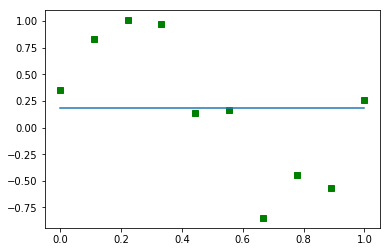

In [39]:
# For M = 0
regressionPlot(X, Y, 0)

Phi [[1.       0.      ]
 [1.       0.111111]
 [1.       0.222222]
 [1.       0.333333]
 [1.       0.444444]
 [1.       0.555556]
 [1.       0.666667]
 [1.       0.777778]
 [1.       0.888889]
 [1.       1.      ]]
loss [0.4325733]
loss [0.31592202]
loss [0.25017587]
loss [0.21276069]
loss [0.1911246]
loss [0.17828801]
loss [0.17036949]
loss [0.16521021]
loss [0.16160908]
loss [0.15889755]
loss [0.15670316]
loss [0.15481813]
loss [0.15312623]
loss [0.15156217]
loss [0.150089]
loss [0.14868553]
loss [0.1473394]
loss [0.14604313]
loss [0.14479198]
loss [0.14358278]
loss [0.14241322]
loss [0.14128151]
loss [0.14018613]
loss [0.13912577]
loss [0.13809923]
loss [0.13710537]
loss [0.13614314]
loss [0.1352115]
loss [0.13430947]
loss [0.13343612]
loss [0.13259052]
loss [0.1317718]
loss [0.1309791]
loss [0.13021159]
loss [0.12946847]
loss [0.12874896]
loss [0.12805232]
loss [0.12737782]
loss [0.12672475]
loss [0.12609243]
loss [0.12548021]
loss [0.12488745]
loss [0.12431352]
loss [0.12375783]
l

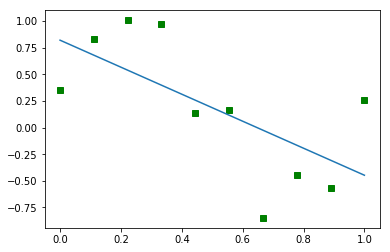

In [33]:
# For M = 1
regressionPlot(X, Y, 1)

Phi [[1.         0.         0.         0.        ]
 [1.         0.111111   0.01234565 0.00137174]
 [1.         0.222222   0.04938262 0.0109739 ]
 [1.         0.333333   0.11111089 0.03703693]
 [1.         0.444444   0.19753047 0.08779123]
 [1.         0.555556   0.30864247 0.17146818]
 [1.         0.666667   0.44444489 0.29629674]
 [1.         0.777778   0.60493862 0.47050795]
 [1.         0.888889   0.79012365 0.70233222]
 [1.         1.         1.         1.        ]]
Iterations 211246
w [[  0.31454823]
 [  7.97285132]
 [-25.39458255]
 [ 17.35364375]]


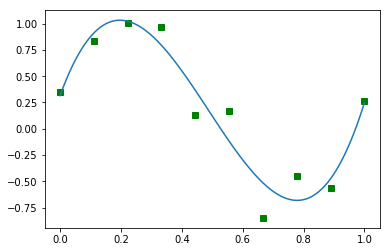

In [19]:
# For M = 3
regressionPlot(X, Y, 3)

## Question 3: Ridge Regression